## Point Pattern Analysis

In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import contextily

# Spatial Stats
from pointpats import distance_statistics, QStatistic, random, PointPattern

In [5]:
# Import the file to this exercise
# Open listings file
listings = pd.read_csv('/content/listings.csv',
                       usecols=['id', 'property_type', 'neighbourhood_cleansed',
                                'bedrooms', 'beds', 'bathrooms_text', 'price',
                                'latitude','longitude'])

# Convert the file to GeoPandas
points_gpd = gpd.GeoDataFrame(listings,
                              geometry= gpd.points_from_xy(
                                  x=listings.longitude,
                                  y=listings.latitude),
                              crs= "EPSG:4326")

In [8]:
# Head
points_gpd.head(3)

,id,neighbourhood_cleansed,latitude,longitude,property_type,bathrooms_text,bedrooms,beds,price,geometry
0,108061,28801,35.606700,-82.555630,Entire rental unit,1 bath,1.0,1.0,$100.00,POINT (-82.55563 35.60670)
1,4394761,28801,35.612440,-82.557240,Entire rental unit,1 bath,2.0,1.0,$114.00,POINT (-82.55724 35.61244)
2,4448604,28804,35.622231,-82.561401,Entire guest suite,1 bath,1.0,2.0,$41.00,POINT (-82.56140 35.62223)


<Axes: >

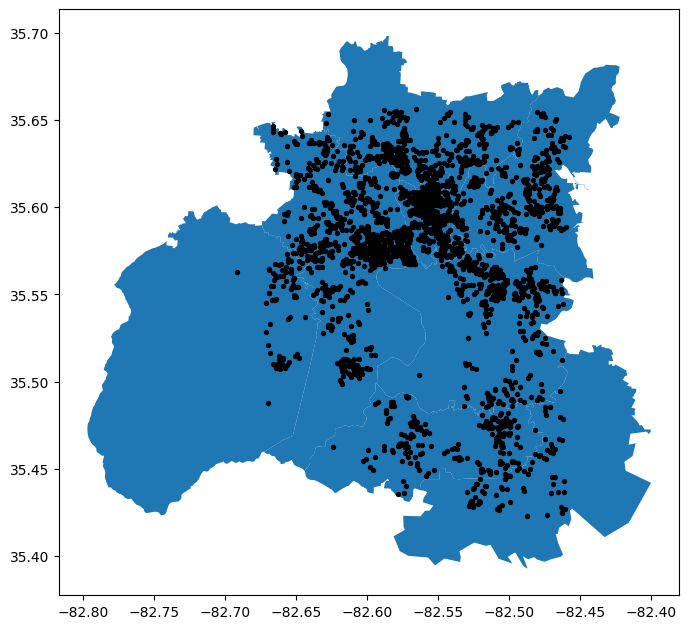

In [ ]:
#Quick check gpd dataframe
fig, ax = plt.subplots(figsize=(8,8))
asheville.plot(ax=ax, color=None, zorder=1)
points_gpd.plot(ax=ax, zorder=2, color='black', markersize=8)

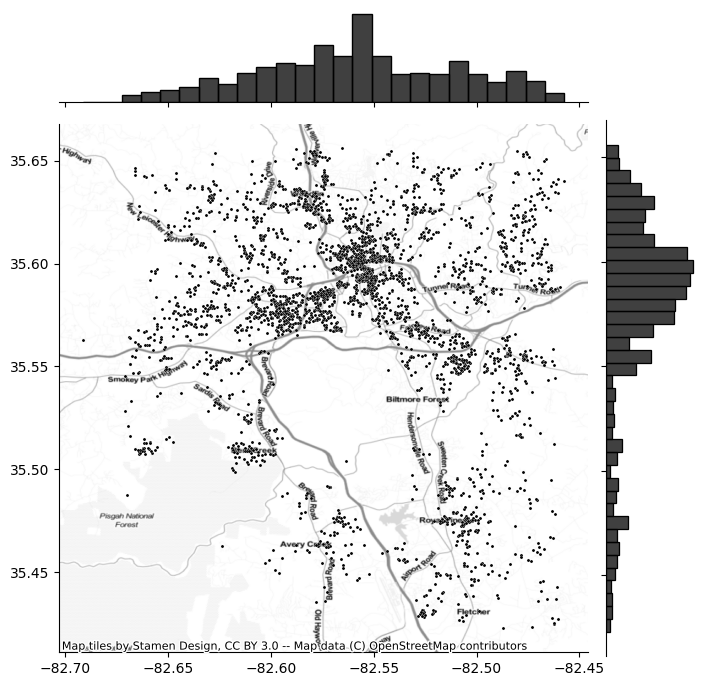

In [ ]:
# Check concentration of the points
plot2 = sns.jointplot(
    x= points_gpd.geometry.x,
    y= points_gpd.geometry.y,
    data= points_gpd,
    s=5, height=7, color='k')

# Add a basemap to the jointplot
contextily.add_basemap( plot2.ax_joint,
                       crs="EPSG:4326",
                        source= contextily.providers.Stamen.TonerLite)

**Ripley's G** test is a cumulative function describing the distribution of distances between nearest neighbors. When you compare that function with a simulated distribution that is randomly generated, you can determine if the points you are studying are randomly distributed or have a spatial pattern.

In [14]:
# Coding Ripley's G (6 mins to run)
ripley_g = distance_statistics.g_test(points_gpd[['longitude', 'latitude']].values,
                                      support=40,
                                      keep_simulations= True)

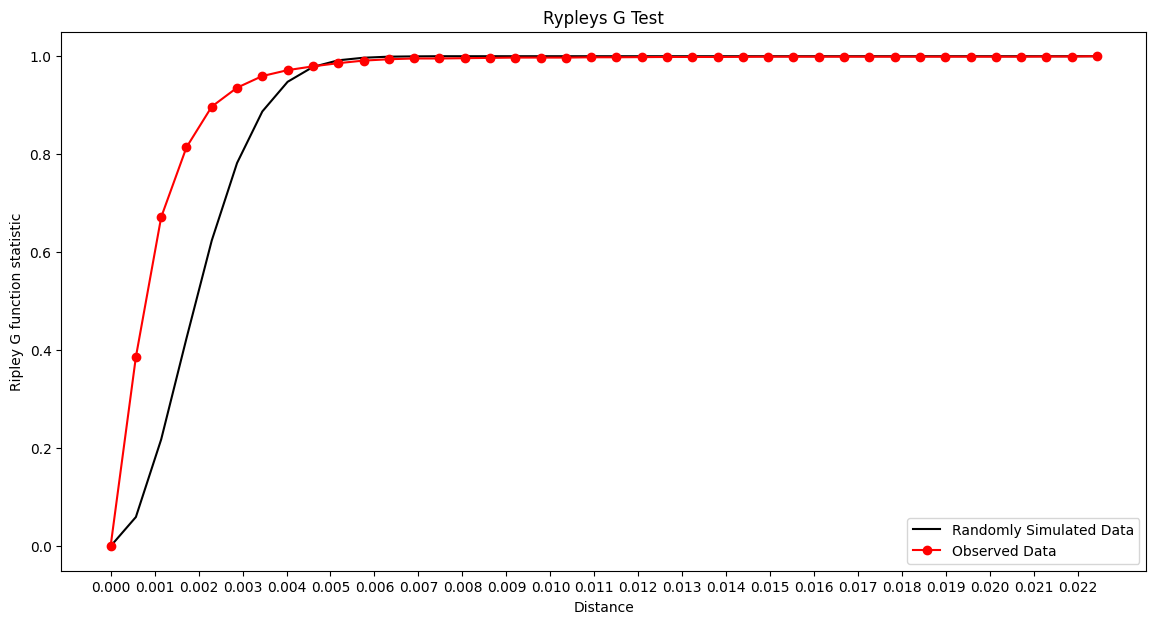

In [44]:
# Plot G test
plt.figure(figsize=(14,7))
# Simulated Data line plot
plt.plot(ripley_g.support,
         np.median(ripley_g.simulations, axis=0),
         color='k', label= 'Randomly Simulated Data')
# Ripley Stat plot for Observed data
plt.plot(ripley_g.support,
         ripley_g.statistic, marker='o',
         color='red', label= 'Observed Data')
# Plot setup
plt.legend(loc=4)
plt.xlabel('Distance')
plt.xticks( np.arange(0.0, 0.023, 0.001) )
plt.ylabel('Ripley G function statistic')
plt.title('Rypleys G Test')
plt.show()


**Riple's K** Test considers all distances, not only next neighbors

In [ ]:
# Coding Ripley's K (35 mins to run)
ripley_k = distance_statistics.k_test(points_gpd[['longitude', 'latitude']].values,
                                      keep_simulations= True)

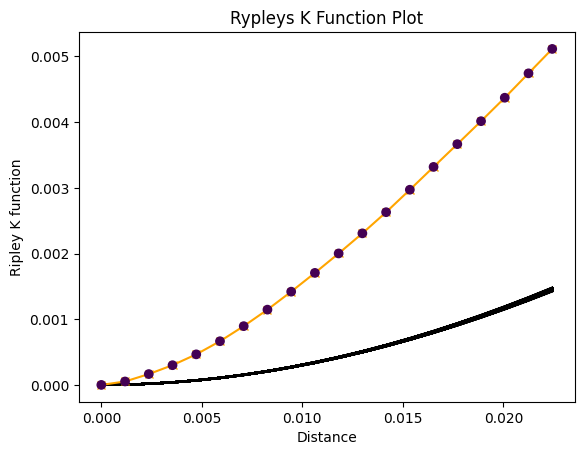

In [ ]:
# Plot K test

# Simulated Data line plot
plt.plot(ripley_k.support,
         ripley_k.simulations.T,
         color='k', alpha=.1)
# Ripley Stat plot for Observed data
plt.plot(ripley_k.support,
         ripley_k.statistic, marker='x',
         color='orange')
# p<0.05 = alternative hypothesis: spatial pattern
plt.scatter(ripley_k.support,
            ripley_k.statistic,
            cmap='viridis', c=ripley_k.pvalue < .05,
            zorder=4)
# Plot setup
plt.xlabel('Distance')
plt.ylabel('Ripley K function')
plt.title('Rypleys K Function Plot')
plt.show()
